酶活性预测实战task:
1、基于T-R-train.csv数据，建立线性回归模型，计算其在T-R-test.Cv数据上的2分数，可视化模型预测结果
2、加入多项式特征(2次、5次)，建立回归模型
3、计算多项式回归模型对测试数据进行预测的r2分数，判断哪个模型预测更准确
4、可视化多项式回归模型数据预测结果，判断哪个模型预测更准确

In [2]:
# load the data
import pandas as pd
import numpy as np
data_train = pd.read_csv('T-R-train.csv')
data_train

,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74
5,54.18,2.80
6,56.19,2.88
7,58.58,2.92
8,61.37,2.96
9,63.34,2.95


In [3]:
# define X_train and y_train
X_train = data_train.loc[:,'T']
y_train = data_train.loc[:,'rate']

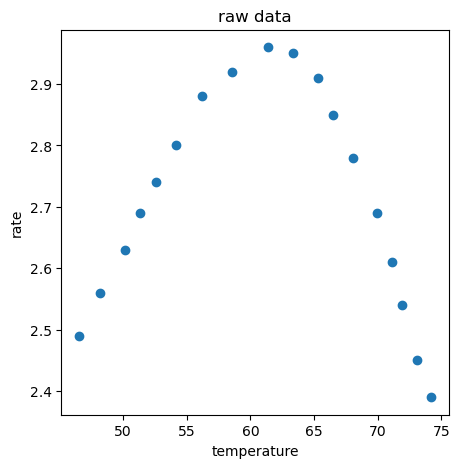

In [4]:
# visualize the data
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train)
plt.title('raw data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [7]:
X_train = np.array(X_train).reshape(-1,1)

In [8]:
# linear regression model prediction
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression()

In [12]:
# load the test data
data_test = pd.read_csv('T-R-test.csv')
X_test = data_test.loc[:,'T']
y_test = data_test.loc[:,'rate']

In [13]:
X_test = np.array(X_test).reshape(-1,1)

In [17]:
# make prediction on the training and testing data
y_train_predict = lr1.predict(X_train)
y_test_predict = lr1.predict(X_test)
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)
print('training r2',r2_train)
print('test r2',r2_test)

training r2 0.016665703886981964
test r2 -0.758336343735132


In [19]:
# generate new data
X_range = np.linspace(40,90,300).reshape(-1,1)
y_range_predisct = lr1.predict(X_range)

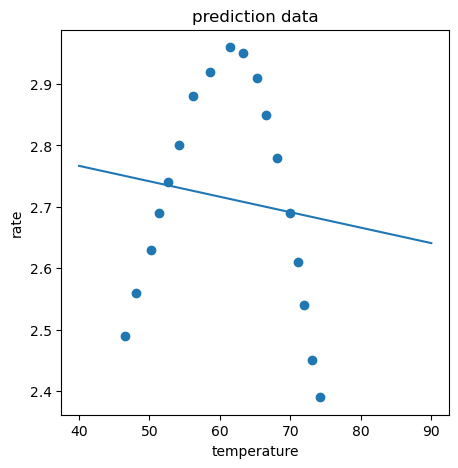

In [20]:
fig2 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_range_predisct)
plt.scatter(X_train,y_train)
plt.title('prediction data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [32]:
# 多项式模型
# generate new features
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.transform(X_test)
print(X_2_train)

poly5 = PolynomialFeatures(degree=5)
X_5_train = poly5.fit_transform(X_train)
X_5_test = poly5.transform(X_test)
print(X_5_train)
print(X_5_train.shape)

[[1.0000000e+00 4.6530000e+01 2.1650409e+03]
 [1.0000000e+00 4.8140000e+01 2.3174596e+03]
 [1.0000000e+00 5.0150000e+01 2.5150225e+03]
 [1.0000000e+00 5.1360000e+01 2.6378496e+03]
 [1.0000000e+00 5.2570000e+01 2.7636049e+03]
 [1.0000000e+00 5.4180000e+01 2.9354724e+03]
 [1.0000000e+00 5.6190000e+01 3.1573161e+03]
 [1.0000000e+00 5.8580000e+01 3.4316164e+03]
 [1.0000000e+00 6.1370000e+01 3.7662769e+03]
 [1.0000000e+00 6.3340000e+01 4.0119556e+03]
 [1.0000000e+00 6.5310000e+01 4.2653961e+03]
 [1.0000000e+00 6.6470000e+01 4.4182609e+03]
 [1.0000000e+00 6.8030000e+01 4.6280809e+03]
 [1.0000000e+00 6.9970000e+01 4.8958009e+03]
 [1.0000000e+00 7.1130000e+01 5.0594769e+03]
 [1.0000000e+00 7.1890000e+01 5.1681721e+03]
 [1.0000000e+00 7.3050000e+01 5.3363025e+03]
 [1.0000000e+00 7.4210000e+01 5.5071241e+03]]
[[1.00000000e+00 4.65300000e+01 2.16504090e+03 1.00739353e+05
  4.68740210e+06 2.18104820e+08]
 [1.00000000e+00 4.81400000e+01 2.31745960e+03 1.11562505e+05
  5.37061900e+06 2.58541599e+08]

In [33]:
lr2 = LinearRegression()
lr2.fit(X_2_train,y_train)

y_2_train_predict = lr2.predict(X_2_train)
y_2_test_predict = lr2.predict(X_2_test)
r2_2_train = r2_score(y_train,y_2_train_predict)
r2_2_test = r2_score(y_test,y_2_test_predict)
print('training r2_2:',r2_2_train)
print('test r2_2:',r2_2_test)

lr5 = LinearRegression()
lr5.fit(X_5_train,y_train)

y_5_train_predict = lr5.predict(X_5_train)
y_5_test_predict = lr5.predict(X_5_test)
r2_5_train = r2_score(y_train,y_5_train_predict)
r2_5_test = r2_score(y_test,y_5_test_predict)
print('training r2_5:',r2_5_train)
print('test r2_5:',r2_5_test)

training r2_2: 0.970051540068943
test r2_2: 0.996395455646867
training r2_5: 0.9978527267142803
test r2_5: 0.543784598216784


In [36]:
# generate new data
X_2_range = np.linspace(40,90,300).reshape(-1,1)
X_2_range = poly2.transform(X_2_range)
y_2_range_predisct = lr2.predict(X_2_range)

X_5_range = np.linspace(40,90,300).reshape(-1,1)
X_5_range = poly5.transform(X_5_range)
y_5_range_predisct = lr5.predict(X_5_range)

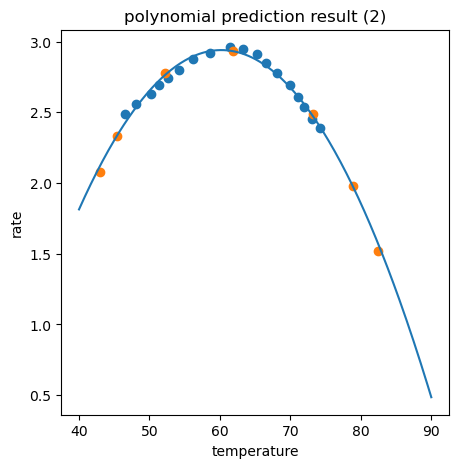

In [37]:
fig3 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_2_range_predisct)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.title('polynomial prediction result (2)')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

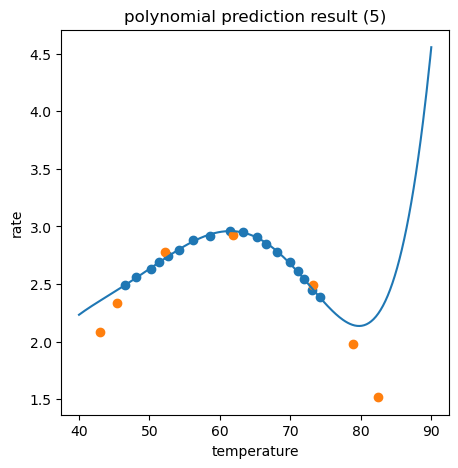

In [38]:
fig4 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_5_range_predisct)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.title('polynomial prediction result (5)')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

酶活性预测实战summary:
1、通过建立二阶多项式回归模型，对酶活性实现了一个较好的预测，无论针对训练或测试数据都得到一个高的x2分数:
2、通过建立线性回归、五阶多项式回归模型，发现存在过拟合或欠拟合情况。过拟合情况下，对于训练数据2分数高(预测准确)，但对于预测数据2分数低(预测不准确) ;
3、无论时通过r2分数，或是可视化模型结果，都可以发现二阶多项式回归模型效果最好
4、核心算法参考链接: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearninear_model.LinearRegression